## Once the  scraping is done, the analysis comes here

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from utils import *
from glob import glob

In [2]:
os.chdir(FOLDER_PROJECT)
df = pd.concat([pd.read_csv(i).drop_duplicates() for i in glob(FOLDER_DB + "/*.csv")], ignore_index=True) 

### Remove all the companies that have NaN names


In [3]:
df = df[df['Company'].notna()]

### Standardize company names

In [4]:
df["Company"] = df["Company"].apply(str.upper)

### Select only the rows after January 1st 2021

In [5]:
df = df[df["Date"] > "20/01/01"]

### Plot and save the distribution for each category

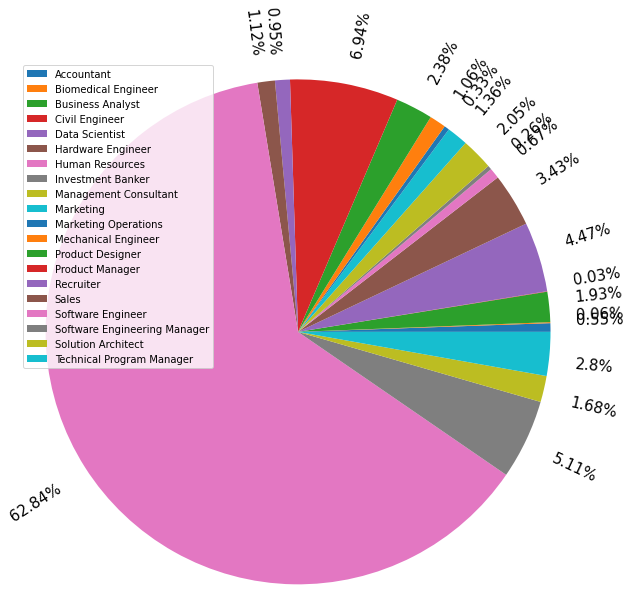

In [6]:
data = df.groupby(["Job"]).size()

per = data.values
job = data.index

fig, ax = plt.subplots(figsize=(10,10))
patches, _, = ax.pie(per, labels=[f"{round(a,2)}%" for a in (per/sum(per)*100)], autopct=None, rotatelabels=True, radius=3, textprops={"size":15})
plt.legend(patches, job, loc="best")
ax.axis('equal');
#fig.savefig(os.path.join(FOLDER_RES, "pie_chart_percentages.png"))

### Distribution of the base salary for software engineers in the US with less than 5 years of Xp, median of 130k in red  

In [7]:
def remove_outliers(x: pd.DataFrame, col):
    q3 = x[col].quantile(0.75)
    q1 = x[col].quantile(0.25)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    return x[(x[col] >= low) & (x[col] <= up)]

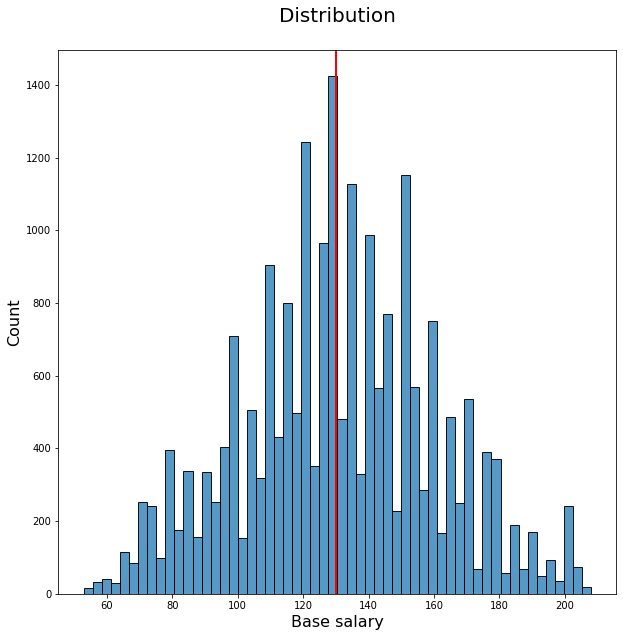

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Distribution\n", size=20)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Base salary', fontsize=16)

df1 = df[(df["Job"]=="Software Engineer") 
        &(df["Country"] == "United States") 
        &(df["Years Xp"] <= 5)]

df1_outliers = remove_outliers(df1, "Base")
c = sns.histplot(data=df1_outliers, x="Base", ax=ax)
ax.axvline(df1_outliers["Base"].median(), linewidth=2, color='r')

## Continue...
